In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def load(X=True, k=0, train=True, embed=False):
    return np.loadtxt('data/{}{}{}{}.csv'.format(
        'X' if X else 'Y', 'tr' if train else 'te', k, '_mat100' if embed else ''),
                      dtype=(float if embed else (str if X else bool)),
                      skiprows=(0 if embed else 1),
                      usecols=(None if embed else 1),
                      delimiter=(' ' if embed else ',')
                     )
X = load()
Y = load(X=False)
Z = load(embed=True)
print(X, Y, Z, sep='\n')
print(X.shape, Y.shape, Z.shape)

['GGAGAATCATTTGAACCCGGGAGGTGGAGGTTGCCGTGAGCTGAGATTGCGCCATTGCACTCCAGCCTGGGCAACAAGAGCAAAACTCTGTCTCACAAAAC'
 'ACCCTGCCTACACCGCGGCGGGGACAGGTGGAGGTTTCAACCCCTGTTTGGCAACCTCGGGCGCAGCCAGGCCCCGCCCAGAAATTTCCGGGACACGCCCC'
 'TGCAAATCTGTAAGCATTTCTCAGGCAATGAATTATGTCAACACAATTGCACCATCATTGATGGACTTGGAAATGCAGACAGAACTGAAGAGGAGCGTCTC'
 ...
 'TGGCCGGCCCGGCGCCGTCACCGCCCTCAAAAGACATGGCGGCGCCTTGCGTCACGTCCGCGCAGTTGCCCCGCCTCCTCTCCGCACACTCCGCCTCCCTT'
 'GCTTCATCATCACAGTGCAGCAGCTGACTACTTGCTAACTAACGTGTTATGCCATTGATAACCAGGAACTTCCTGACTGACGTTGAACGGGAAAAGGATGG'
 'GCAGAATGAAGCTCTTGTTGCTTTGGCATTAATAGCAGCTTTAGAATTGGGTAAGTACCCCAGTGACAAACTTATTTTCTTCTATTTTTATCTTGGATGAA']
[False  True  True ...  True  True False]
[[0.         0.02173913 0.01086957 ... 0.         0.         0.        ]
 [0.01086957 0.01086957 0.02173913 ... 0.01086957 0.01086957 0.        ]
 [0.01086957 0.02173913 0.         ... 0.02173913 0.01086957 0.02173913]
 ...
 [0.01086957 0.02173913 0.01086957 ... 0.01086957 0.         0.        ]
 [0.         0.01086957 0

In [3]:
L = np.array([len(x) for x in X])
print(L.min(), L.max())

101 101


In [4]:
s = 'ATCG'
def one_hot(X):
    '''NxT -> NxTx4'''
    return np.array([list(x) for x in X])[:,:,None] == np.array(list(s))[None,None,:]
X1 = one_hot(X)
print(X1.shape)

(2000, 101, 4)


In [5]:
Ibound = np.nonzero(Y)[0]
Iunbound = np.nonzero(1 - Y)[0]
def plot_correl(f, X=X1):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    f(X[Ibound])
    plt.title('Bound sequences')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    f(X[Iunbound])
    plt.title('Unbound sequences')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [9]:
print('{:.0f}% of bound sequences'.format(100 * Y.mean()))

49% of bound sequences


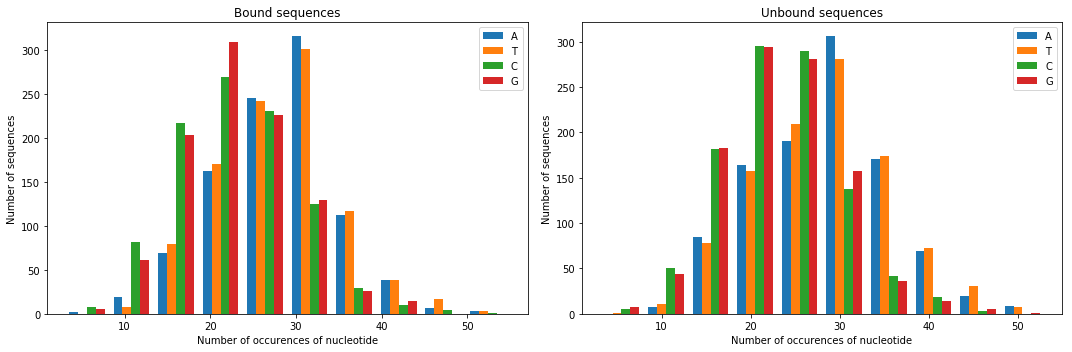

In [6]:
def f(X1):
    plt.hist(X1.sum(axis=1), label=list(s))
    plt.ylabel('Number of sequences')
    plt.xlabel('Number of occurences of nucleotide')
plot_correl(f)

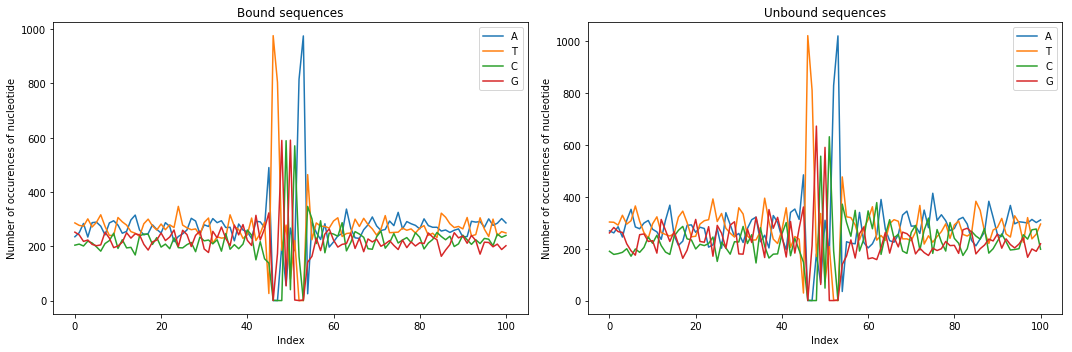

In [7]:
def f(X1):
    for i in range(4):
        plt.plot(X1.sum(axis=0)[:,i], label=s[i])
    plt.xlabel('Index')
    plt.ylabel('Number of occurences of nucleotide')
plot_correl(f)

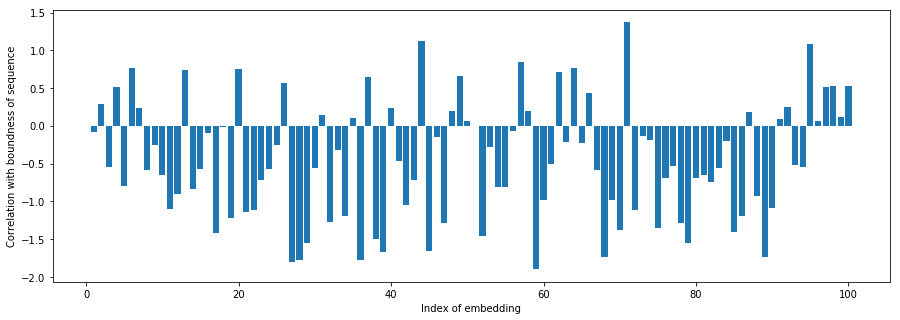

In [24]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(1, 101), (Z * (2*Y-1)[:,None]).sum(axis=0))
plt.xlabel('Index of embedding')
plt.ylabel('Correlation with boundness of sequence')
plt.show()

Conclusions:
- $A \approx T \neq C \approx G$
- interesting things happen at the index 50, indices 0-49 and 51-100 are less important as we go near the bounds

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X, Y = load(embed=True), load(X=False)
Xtr, Xte, Ytr, Yte = train_test_split(X, Y)
s = SVC()
s = GridSearchCV(s, {'C': 10**np.linspace(2, 4, 10)})
s.fit(Xtr, Ytr)
print(s.best_params_)
print(s.score(Xtr, Ytr))
print(s.score(Xte, Yte))

{'C': 774.263682681127}
0.62
0.562
